# InterviewPrep: NLP [Fall 2023]
## Day 1

## Import Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string as st
import re

In [ ]:
nltk.download('stopwords')
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## Load the Data

In [ ]:
data = pd.read_csv("spam.csv")
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data['Message'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

<Axes: >

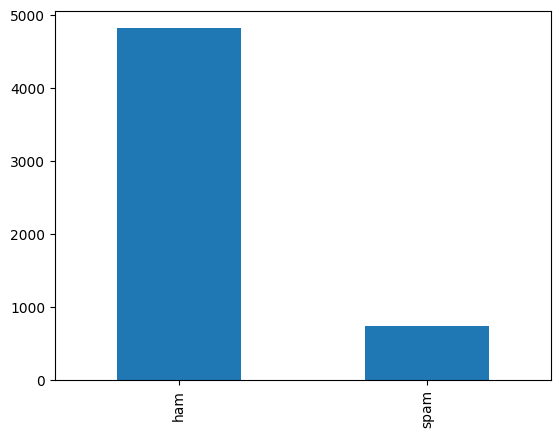

In [ ]:
data['Category'].value_counts().plot(kind='bar')

## Data Preprocessing

### 1. Punctuation Removal and Lower-Casing

In [ ]:
dir(st)

['Formatter',
 'Template',
 '_ChainMap',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_re',
 '_sentinel_dict',
 '_string',
 'ascii_letters',
 'ascii_lowercase',
 'ascii_uppercase',
 'capwords',
 'digits',
 'hexdigits',
 'octdigits',
 'printable',
 'punctuation',
 'whitespace']

In [ ]:
st.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punc(text):
  clt = ""
  for i in text:
    if i not in st.punctuation:
      clt+=i
  return clt

remove_punc("SNUc_Coding_Club!$#>12@NLp")

'SNUcCodingClub12NLp'

In [ ]:
data['clt_1'] = data['Message'].apply(remove_punc)

data

,Category,Message,clt_1
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?,Will ü b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...
5570,ham,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...


In [ ]:
data['Message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
data['clt_1'][0]

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [ ]:
"SNUC_Coding CLUB".lower()

'snuc_coding club'

### 2. Tokenization

In [ ]:
text = "Hi welcome to the NLP Course"
tokens = re.split("\s+",text)
tokens

['Hi', 'welcome', 'to', 'the', 'NLP', 'Course']

In [ ]:
data['clt_1'][0]

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [ ]:
def tokenize(text):
  text = text.lower()
  tokens = []
  tokens = re.split("\s+",text)
  return tokens

tokenize(data['clt_1'][0])

['go',
 'until',
 'jurong',
 'point',
 'crazy',
 'available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'there',
 'got',
 'amore',
 'wat']

In [ ]:
data['Tokens'] = data['clt_1'].apply(tokenize)
data

,Category,Message,clt_1,Tokens
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,..."
5568,ham,Will ü b going to esplanade fr home?,Will ü b going to esplanade fr home,"[will, ü, b, going, to, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[pity, was, in, mood, for, that, soany, other,..."
5570,ham,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[the, guy, did, some, bitching, but, i, acted,..."


### 3. Stopwords Removal

In [ ]:
from nltk.corpus import stopwords

stopwords.fileids()

['arabic',
 'azerbaijani',
 'basque',
 'bengali',
 'catalan',
 'chinese',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hebrew',
 'hinglish',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [ ]:
stp_words = stopwords.words("english")

def remove_stopwords(tokens):
  return [token for token in tokens
          if token not in stopwords.words("english")]

test = ['Muthu','is','taking','NLP','Session','This','has']
remove_stopwords(test)

['Muthu', 'taking', 'NLP', 'Session', 'This']

In [ ]:
data['Tokens'] = data['Tokens'].apply(remove_stopwords)

### 4. Stemming

In [ ]:
from nltk import PorterStemmer

dir(PorterStemmer)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'stem']

In [ ]:
ps = PorterStemmer()

test = "Running"
ps.stem(test)

'run'

In [ ]:
def stemming(tokens):
  ps = PorterStemmer()
  return [ps.stem(token) for token in tokens]

test = ['Muthu','Cooking','Fishing']
stemming(test)

['muthu', 'cook', 'fish']

In [ ]:
data['stem_tokens'] = data['Tokens'].apply(stemming)
data['stem_tokens'][9]

['mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030']

In [ ]:
data['Tokens'][9]

['mobile',
 '11',
 'months',
 'u',
 'r',
 'entitled',
 'update',
 'latest',
 'colour',
 'mobiles',
 'camera',
 'free',
 'call',
 'mobile',
 'update',
 'co',
 'free',
 '08002986030']

### 5. Lemmatization

In [ ]:
from nltk import WordNetLemmatizer

dir(WordNetLemmatizer)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'lemmatize']

In [ ]:
word_net = WordNetLemmatizer()
word_net.lemmatize("Mobile")

'Mobile'

In [ ]:
ps.stem("Mobile")

'mobil'

In [ ]:
def lemma(tokens):
  word_net = WordNetLemmatizer()
  return [word_net.lemmatize(token) for token in tokens]

lemma(data['Tokens'][9])

['mobile',
 '11',
 'month',
 'u',
 'r',
 'entitled',
 'update',
 'latest',
 'colour',
 'mobile',
 'camera',
 'free',
 'call',
 'mobile',
 'update',
 'co',
 'free',
 '08002986030']

In [ ]:
data['lemma_tokens'] = data['Tokens'].apply(lemma)
data

,Category,Message,clt_1,Tokens,stem_tokens,lemma_tokens
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[2nd, time, tried, 2, contact, u, u, £750, pou...","[2nd, time, tri, 2, contact, u, u, £750, pound...","[2nd, time, tried, 2, contact, u, u, £750, pou..."
5568,ham,Will ü b going to esplanade fr home?,Will ü b going to esplanade fr home,"[ü, b, going, esplanade, fr, home]","[ü, b, go, esplanad, fr, home]","[ü, b, going, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[pity, mood, soany, suggestions]","[piti, mood, soani, suggest]","[pity, mood, soany, suggestion]"
5570,ham,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[guy, bitching, acted, like, id, interested, b...","[guy, bitch, act, like, id, interest, buy, som...","[guy, bitching, acted, like, id, interested, b..."


## Preprocessed Text

In [ ]:
def return_seq(tokens):
  return " ".join([token for token in tokens])

return_seq(data['lemma_tokens'][9])

'mobile 11 month u r entitled update latest colour mobile camera free call mobile update co free 08002986030'

In [ ]:
data['Message'][9]

'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030'

In [ ]:
data['preprocess_text'] = data['lemma_tokens'].apply(return_seq)
data

,Category,Message,clt_1,Tokens,stem_tokens,lemma_tokens,preprocess_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazy, available, bugis, n...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]",u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]",nah dont think go usf life around though
...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[2nd, time, tried, 2, contact, u, u, £750, pou...","[2nd, time, tri, 2, contact, u, u, £750, pound...","[2nd, time, tried, 2, contact, u, u, £750, pou...",2nd time tried 2 contact u u £750 pound prize ...
5568,ham,Will ü b going to esplanade fr home?,Will ü b going to esplanade fr home,"[ü, b, going, esplanade, fr, home]","[ü, b, go, esplanad, fr, home]","[ü, b, going, esplanade, fr, home]",ü b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[pity, mood, soany, suggestions]","[piti, mood, soani, suggest]","[pity, mood, soany, suggestion]",pity mood soany suggestion
5570,ham,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[guy, bitching, acted, like, id, interested, b...","[guy, bitch, act, like, id, interest, buy, som...","[guy, bitching, acted, like, id, interested, b...",guy bitching acted like id interested buying s...
